<a href="https://colab.research.google.com/github/RunoRemid/Stat-112-Project/blob/main/Stat112_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving TUM_student_stress_dataset_DIRTY.csv to TUM_student_stress_dataset_DIRTY (3).csv
--- STEP 1: Loading Data ---
Data loaded successfully.
Initial Size: (1020, 17)
First 5 rows:
                   university name  YEAR_entry  yearSurvey  City-ORIGIN  \
0   Technical University of Munich      2022.0       2022.0     Cologne   
1   Technical University of Munich      2021.0       2022.0      Berlin   
2   Technical University Of Munich      2022.0          NaN     Dresden   
3   Technical University of Munich      2021.0       2021.0     Dresden   
4  Technical University of Munich       2019.0       2020.0      Munich   

   gEnder Program level       FiEld livingArrangement part-time_job  \
0  F3mal3           MSc    Business  Shared Apartment            No   
1  Female           BSc  Humanities              Dorm           Yes   
2  Female           BSc        STEM             Alone           Yes   
3    Male           BSc        stem       Family Home           Yes   
4  Female   

<Figure size 1000x600 with 0 Axes>

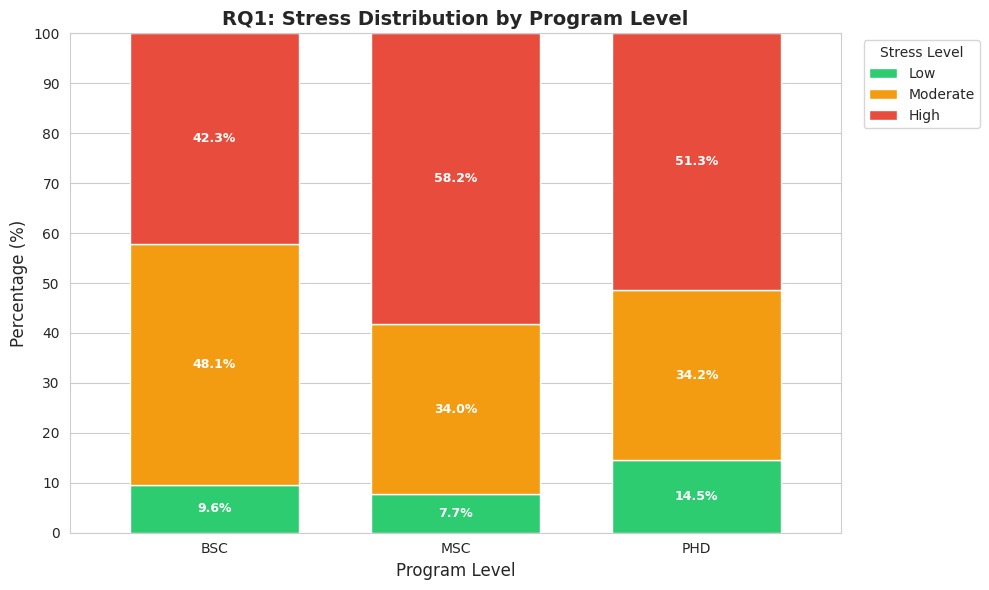

Graph 2: Sleep Hours vs GPA


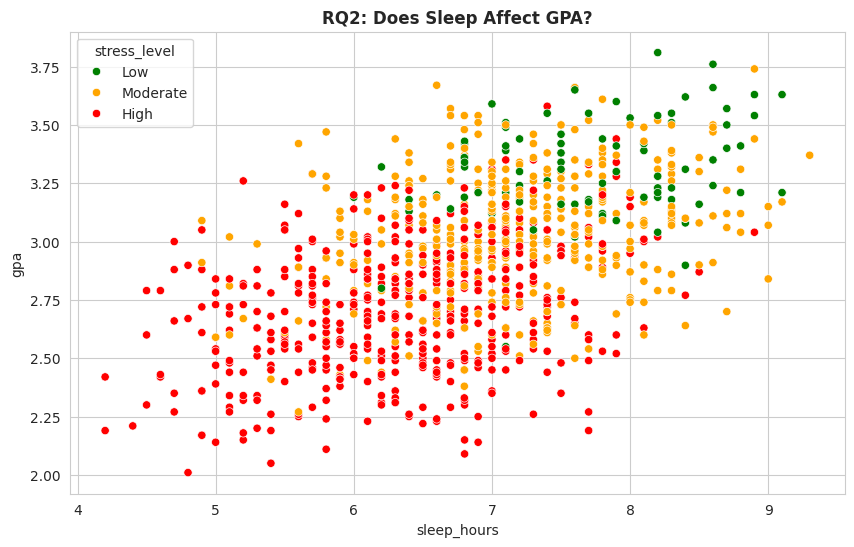

Graph 3: Screen Time vs Stress Level


/tmp/ipython-input-2097123793.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stress_level', y='screen_time', order=['Low', 'Moderate', 'High'], palette='Set2')


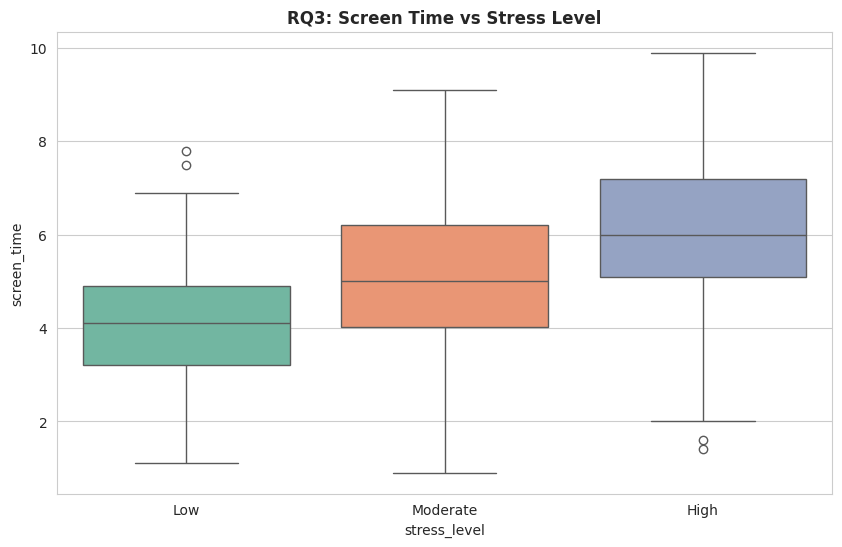

Graph 4: Gender Distribution by Field


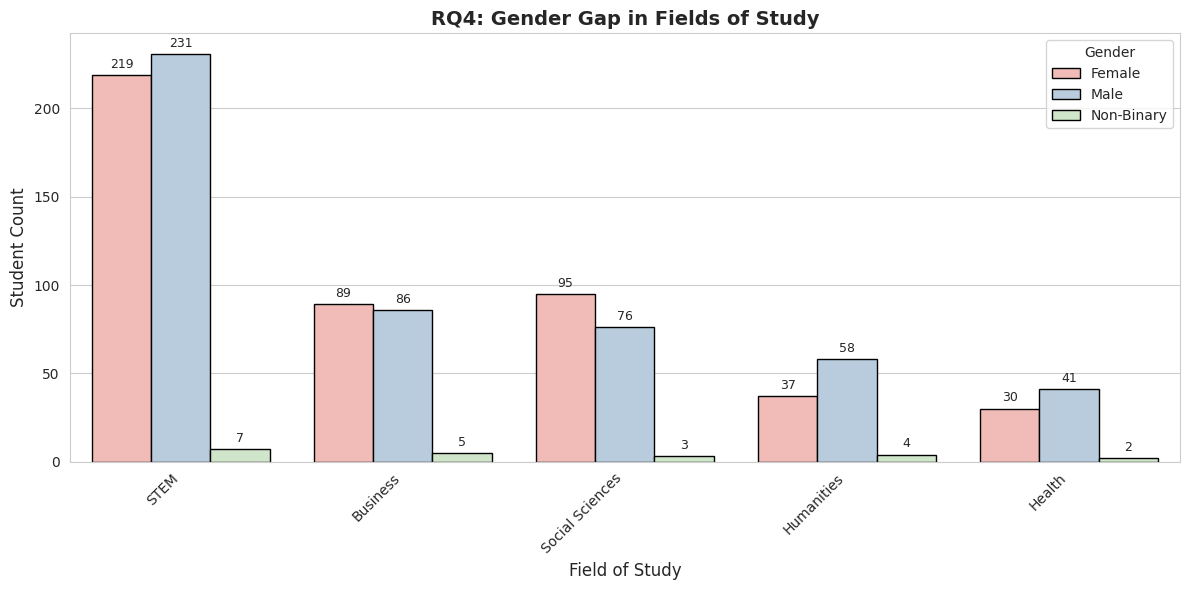

Graph 5: Scholarship vs GPA


/tmp/ipython-input-2097123793.py:527: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='scholarship', y='gpa', palette='muted')


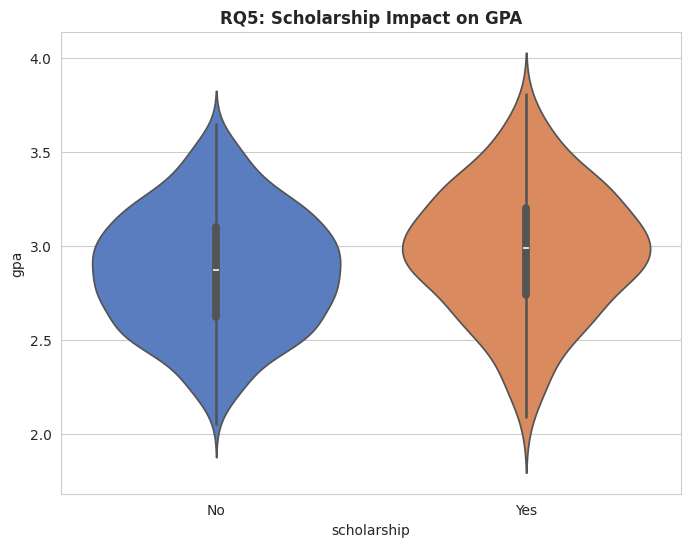

Graph 6: Job vs Study Hours


/tmp/ipython-input-2097123793.py:536: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='part_time_job', y='study_hours', palette='coolwarm')


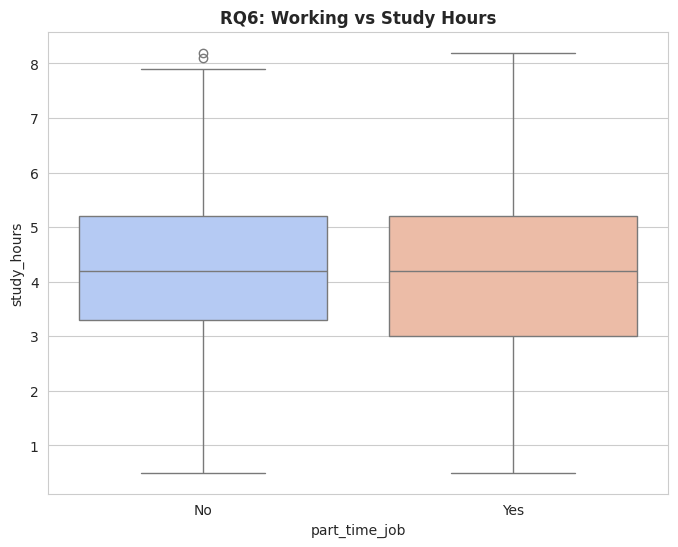

Graph 7: GPA Trend over Years


/tmp/ipython-input-2097123793.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['entry_year_int'] = plot_data['entry_year_int'].astype(int)


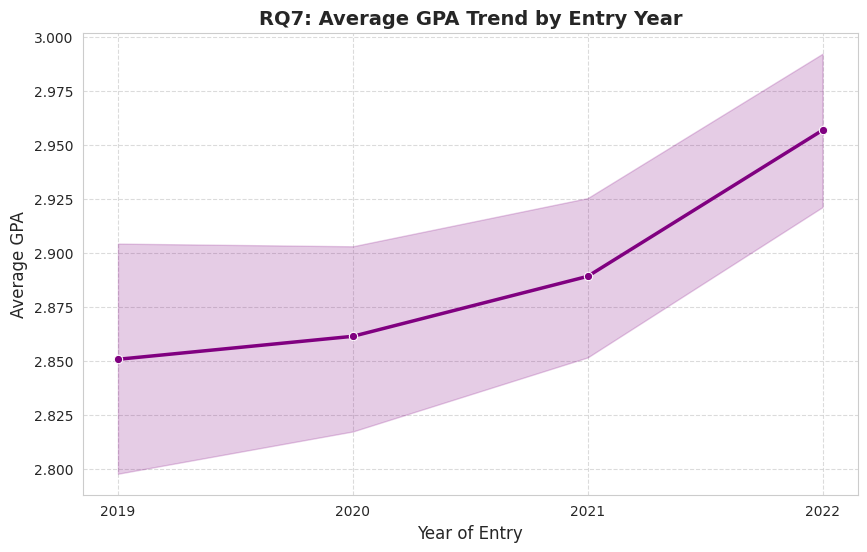

Graph 8: Living Arrangement vs Stress


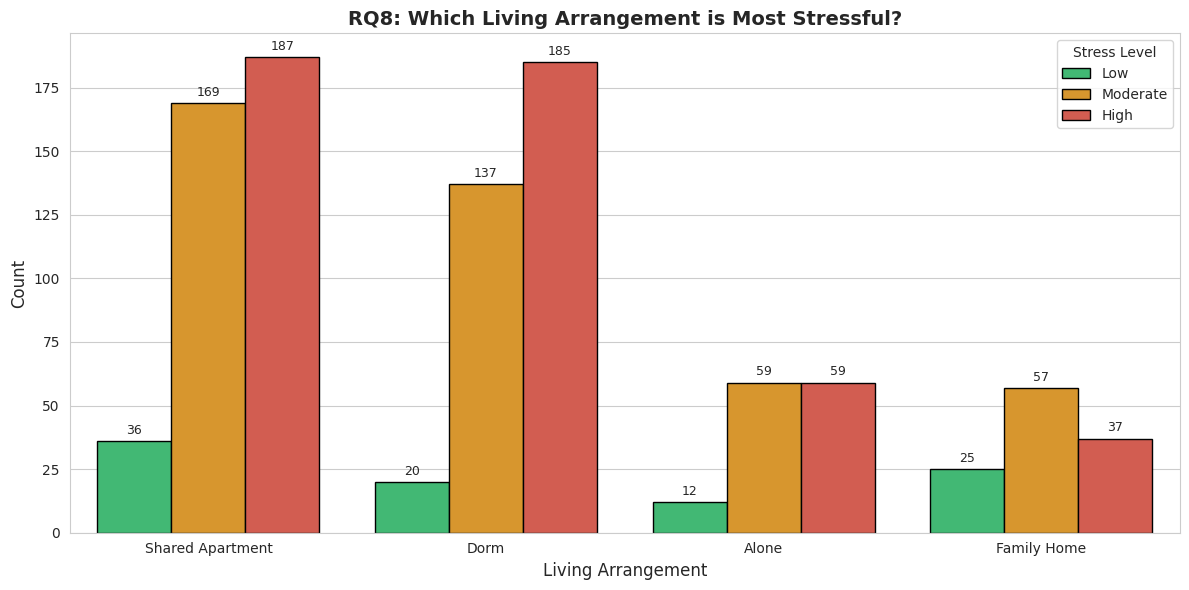

Graph 9: Exercise vs Stress


/tmp/ipython-input-2097123793.py:600: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='stress_level', y='exercise_hours', order=['Low', 'Moderate', 'High'], ci=None,
/tmp/ipython-input-2097123793.py:600: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='stress_level', y='exercise_hours', order=['Low', 'Moderate', 'High'], ci=None,


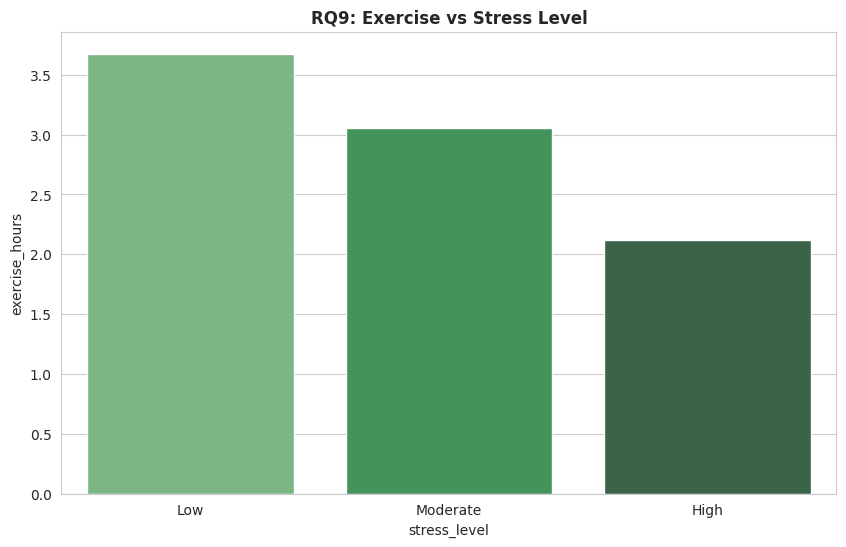

Graph 10: Correlation Matrix


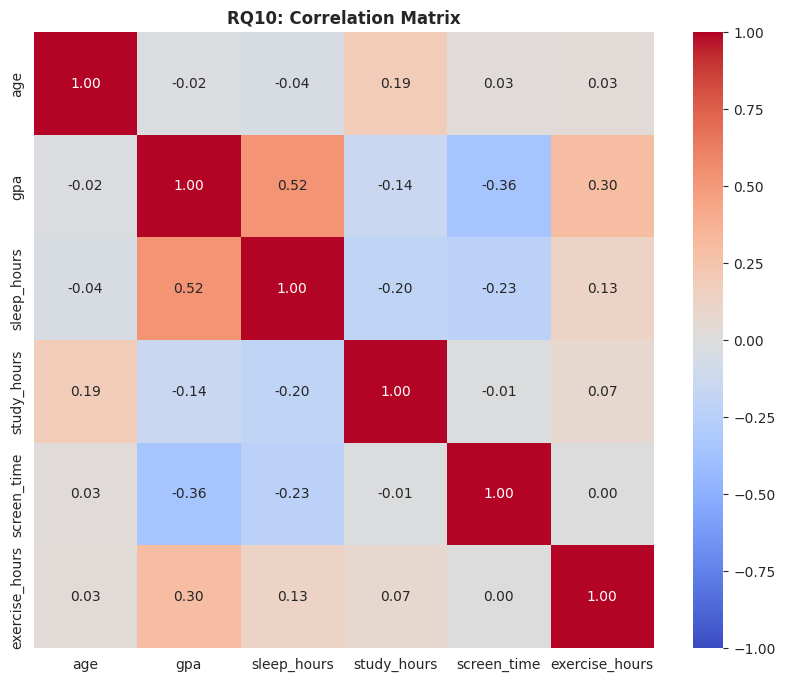

--- CODE END ---


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# =========================================================
# FILE UPLOAD
# =========================================================
from google.colab import files
uploaded = files.upload()


# =========================================================
# PART 1: DATA CLEANING AND PREPARATION
# =========================================================
# In this section, we prepare the raw dataset for analysis. Real-world data is often "dirty,"
# containing typos, inconsistencies, missing values, and logical errors.
# Our goal is to transform this raw input into a structured, reliable format.

# 1. LOADING THE DATA
# ---------------------------------------------------------
print("--- STEP 1: Loading Data ---")
try:
    # Attempt to read the CSV file into a Pandas DataFrame.
    # We use a try-except block to handle potential file path errors gracefully.
    df = pd.read_csv('TUM_student_stress_dataset_DIRTY.csv')
    print("Data loaded successfully.")
    # Display the initial dimensions of the dataset (rows, columns) to understand data volume.
    print(f"Initial Size: {df.shape}")
except Exception as e:
    # If loading fails, output the specific error message for debugging purposes.
    print(f"ERROR: Could not load file. ({e})")

# Display the first 5 rows to visually inspect the data structure and potential format issues.
print("First 5 rows:")
print(df.head())
# Display the last 5 rows to ensure the file was read completely and check for footer noise.
print("\nLast 5 rows:")
print(df.tail())
# Print a concise summary of the DataFrame, including index dtype and column dtypes,
# non-null values, and memory usage. This helps identify missing data early on.
print("\nData Info:")
print(df.info())


print("-" * 30)


# 2. STANDARDIZING COLUMN NAMES
# ---------------------------------------------------------
print("--- STEP 2: Cleaning Column Names ---")
# The raw column names are inconsistent (mixed case, spaces, special characters).
# We rename them to 'snake_case' format (lowercase with underscores) for consistency
# and ease of access using dot notation throughout the analysis.
df.rename(columns={
    "university name": "university_name",
    "YEAR_entry": "year_entry",
    "yearSurvey ": "year_survey",
    "City-ORIGIN": "city_origin",   # Fixing caps lock problems
    "gEnder": "gender",
    "Program level": "program_level",
    "FiEld": "field",
    "livingArrangement": "living_arrangement", # Converting CamelCase to snake_case
    "part-time_job": "part_time_job",
    "ScholarShip": "scholarship",
    "AGE ": "age",
    "gpa": "gpa",
    "SleepHours": "sleep_hours",
    "Study hour(s)": "study_hours", # Removing parentheses to have cleaner visual
    "screenTime": "screen_time",
    "exercise_hours": "exercise_hours",
    "stressLevel": "stress_level"
}, inplace=True)

# We're verifying that the renaming process was successful.
print("Updated Column Names:")
print(df.columns.tolist())
print("-" * 30)

# 3. REMOVING CONSTANT (USELESS) COLUMNS
# ---------------------------------------------------------
print("--- STEP 3: Dropping Constant Columns ---")

# We're creating a loop and checking each columnx
for col in df.columns:
    #If the unique value number is 1 for any columns, that means
    # it is an useless colunmn, which we will delete.
    if df[col].nunique() == 1:
        print(f"Column '{col}' has only 1 unique value. Dropping...")
        df.drop(columns=[col], inplace=True)
    else:
        # If there isn't any constant columns, then we will print
        # a message and keep the column to protect the variance
        print(f"Column '{col}' kept. (Variance exists)")
        pass

print("Finished dropping constant columns.")
print("-" * 30)

# 4. REMOVING DUPLICATE ROWS
# ---------------------------------------------------------
print("--- STEP 4: Duplicate Check ---")
# We're counting the number of fully duplicate rows. Duplicates can effect statistical analysis
# by artificially affecting the weight of certain datas.
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    # If duplicates exist we're removing the duplicates.
    df.drop_duplicates(inplace=True)
    print(f"{duplicate_count} duplicate rows removed.")
else:
    # If not, we're printing a message.
    print("No duplicate rows found.")
print("-" * 30)

# 5. STRING AND FORMAT CLEANING (Double Spaces & Special Characters)
# ---------------------------------------------------------
print("--- STEP 5: Comprehensive String Cleaning ---")

# We're identifying all the columns with object data type (strings)
# to apply the cleaning functions that are repeating.
string_cols = df.select_dtypes(include='object').columns

for col in string_cols:
    # 1. Standardization: We're converting all text to string and making it lowercase to compare.
    # Also we strip leading/trailing whitespace to avoid matching errors like "'Male ' vs 'Male'".
    df[col] = df[col].astype(str).str.lower().str.strip()

    # 2. Noise Removal: The dataset contains random special characters (#, ., ", ').
    # We remove these to be sure about having clean categorical values.
    df[col] = df[col].str.replace('#', '')
    if col != 'study_hours': # Exception: We're not removing decimals if study_hours were stored as strings
        df[col] = df[col].str.replace('.', '')
    df[col] = df[col].str.replace('"', '')
    df[col] = df[col].str.replace("'", "")

    # 3. DOUBLE SPACE CLEANING:
    # Typos generally includes multiple spaces between words. We're using the split() function
    # in order to break for any white space and join() function with a single space to normalize the text spacing.
    df[col] = df[col].apply(lambda x: ' '.join(str(x).split()))

    # 4. NaN Handling: We're converting the string 'nan' back to a proper NumPy NaN object
    # so that pandas will be able to recognize missing data correctly.
    df[col] = df[col].replace('nan', np.nan)

print("All string columns cleaned: #, ., quotes, and double spaces removed.")
print("-" * 30)

# 6. FIXING TYPOS AND CATEGORICAL CORRECTIONS
# ---------------------------------------------------------
print("--- STEP 6: Fixing Typos and Categorical Values ---")
# The dataset contains some replacement letters fore some letters like '3' for 'E', '1' for 'I', '0' for 'O'.
# We should map these typos manually to correct English characters to standardize categories.

# 1. GENDER
print("Standardizing Gender...")
# We're correcting 'Non-B1Nary' and other variations.
df['gender'] = df['gender'].str.replace('3', 'e')
df['gender'] = df['gender'].str.replace('0', 'o')
df['gender'] = df['gender'].str.replace('1', 'i')
df['gender'] = df['gender'].str.title()  # Capitalize first letter (e.g., 'female' -> 'Female')
# We're ensuring consistent naming for Non-Binary individuals.
df['gender'] = df['gender'].str.replace('Non-Binary', 'Non-Binary', case=False)

# 2. FIELD (Major/Department)
print("Standardizing Field...")
# Correcting replacement letters in field names.
df['field'] = df['field'].str.replace('1', 'i')
df['field'] = df['field'].str.replace('3', 'e')
df['field'] = df['field'].str.replace('0', 'o')

# Mapping Strategy: Grouping specific majors into their own original categories (for example: 'medicine' -> 'Health').
# This numerical decrease helps us visualize trends across major disciplines rather than specific courses.
field_map = {
    'stem': 'STEM',
    'engineering': 'STEM',
    'science': 'STEM',
    'socialsci': 'Social Sciences',
    'social sciences': 'Social Sciences',
    'socialscience': 'Social Sciences',
    'humanities': 'Humanities',
    'business': 'Business',
    'health': 'Health',
    'medicine': 'Health',
    'arts': 'Arts',
    'law': 'Law'
}
# We're applying the mapping dictionary.
df['field'] = df['field'].replace(field_map)
# We're applying the title casing for better presentation, preserving 'STEM' as uppercase.
df['field'] = df['field'].apply(lambda x: x if x == 'STEM' or pd.isna(x) else str(x).title())
# We're fixing any remaining errors.
df['field'] = df['field'].str.replace('Socialsciences', 'Social Sciences')

# 3. LIVING ARRANGEMENT
print("Standardizing Living Arrangement...")
# We're correcting the letter replacement issue.
df['living_arrangement'] = df['living_arrangement'].str.replace('0', 'o')
df['living_arrangement'] = df['living_arrangement'].str.replace('3', 'e')
df['living_arrangement'] = df['living_arrangement'].str.replace('1', 'i')

# We're mapping variations to standard categories ('dormitory' and 'dorm' -> 'Dorm').
living_map = {
    'shared apartment': 'Shared Apartment',
    'sharedapartment': 'Shared Apartment',
    'dorm': 'Dorm',
    'dormitory': 'Dorm',
    'alone': 'Alone',
    'family home': 'Family Home',
    'parents home': 'Family Home',
    'with family': 'Family Home'
}
df['living_arrangement'] = df['living_arrangement'].replace(living_map)
# We're standardizing casing.
df['living_arrangement'] = df['living_arrangement'].apply(
    lambda x: x if x in living_map.values() or pd.isna(x) else str(x).title())

# 4. CITY ORIGIN
print("Standardizing City Origin...")
# We're fixing replacement letters ('C0l0gne').
df['city_origin'] = df['city_origin'].str.replace('0', 'o')
df['city_origin'] = df['city_origin'].str.replace('3', 'e')
df['city_origin'] = df['city_origin'].str.replace('1', 'i')
# We're standardizing them to Title Case (e.g., 'munich' -> 'Munich').
df['city_origin'] = df['city_origin'].str.title()

# 5. UNIVERSITY NAME
print("Standardizing University Name...")
if 'university_name' in df.columns:
    # Cleaning any remaining replacement letter if the columns didn't dropped earlier.
    df['university_name'] = df['university_name'].str.replace('0', 'o')
    df['university_name'] = df['university_name'].str.replace('3', 'e')
    df['university_name'] = df['university_name'].str.replace('1', 'i')
    # Fixing specific naming errors.
    df['university_name'] = df['university_name'].replace('technicaluniversityofmunich',
                                                          'technical university of munich')
    df['university_name'] = df['university_name'].str.title()
    # If all names are now the same, we're dropping the column.
    if df['university_name'].nunique() <= 1:
        print("   -> University Name is now uniform, dropping after cleaning.")
        df.drop(columns=['university_name'], inplace=True)

# 6. STRESS LEVEL
print("Standardizing Stress Level...")
# Fixing typos in this variable is very important.
df['stress_level'] = df['stress_level'].str.replace('0', 'o')
df['stress_level'] = df['stress_level'].str.title()
# We're filtering to keep only valid stress levels, removing any other values.
valid_stress = ['High', 'Moderate', 'Low']
df = df[df['stress_level'].isin(valid_stress)]

# 7. BINARY COLUMNS
print("Fixing Binary columns...")

# We're defining a custom function to interpret various inputs as Yes/No.
# This handles cases like 'y', 'Y', 'yes', 'n', 'no'.
def clean_binary_manual(val):
    val_str = str(val).lower()
    if 'y' in val_str: return 'Yes'
    if 'n' in val_str: return 'No'
    return np.nan

# We're applying the binary cleaning function to relevant columns.
df['part_time_job'] = df['part_time_job'].apply(clean_binary_manual)
df['scholarship'] = df['scholarship'].apply(clean_binary_manual)

print("-" * 30)

# 7. DATE AND NUMERIC CONVERSIONS
# ---------------------------------------------------------
print("--- STEP 7: Data Type Conversions ---")
# We're converting 'year' columns to numeric first to handle non-numeric errors.
df['year_entry'] = pd.to_numeric(df['year_entry'], errors='coerce')
df['year_survey'] = pd.to_numeric(df['year_survey'], errors='coerce')
# We're converting year to datetime for potential.
df['year_entry'] = pd.to_datetime(df['year_entry'], format='%Y', errors='coerce')
df['year_survey'] = pd.to_datetime(df['year_survey'], format='%Y', errors='coerce')

# We're converting the columns that represent continuous data (GPA, hours) to float.
numeric_cols = ['age', 'gpa', 'sleep_hours', 'study_hours', 'screen_time', 'exercise_hours']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

print("-" * 30)

# We're displaying the descriptive statistics (mean, std, min, max) for the numeric columns.
# This helps us identifying the remaining outliers (e.g., max age 200).
print("--- Descriptive Statistics ---")
print(df.describe())
print("-" * 30)


# 8. LOGICAL RANGE CHECK
# ---------------------------------------------------------
print("--- STEP 8: Removing Illogical Values ---")
# Checking the integrity of data: We're removing values that are impossible in reality.
# Age: Only the realistic student ages (15-80).
age_issues = ((df['age'] < 15) | (df['age'] > 80)).sum()
if age_issues > 0:
    print(f"   {age_issues} illogical age values found and set to NaN (age <15 or >80)")
    df.loc[(df['age'] < 15) | (df['age'] > 80), 'age'] = np.nan
else:
    print("   No illogical age values found")
# GPA: We're using the Technical University of Munich's (0.0 - 4.0) scale.
gpa_issues = ((df['gpa'] < 0) | (df['gpa'] > 4)).sum()
if gpa_issues > 0:
    print(f"   {gpa_issues} illogical GPA values found and set to NaN (GPA <0 or >4)")
    df.loc[(df['gpa'] < 0) | (df['gpa'] > 4), 'gpa'] = np.nan
else:
    print("   No illogical GPA values found")
# Hours: Daily activities cannot be over 24 hours.
for col in ['sleep_hours', 'study_hours', 'screen_time', 'exercise_hours']:
    hours_issues = ((df[col] < 0) | (df[col] > 24)).sum()
    if hours_issues > 0:
        print(f"   {hours_issues} illogical values in '{col}' (hours <0 or >24)")
        df.loc[(df[col] < 0) | (df[col] > 24), col] = np.nan
    else:
        print(f"   No issues in '{col}'")

print("-" * 30)





# 9. MISSING DATA STRATEGY
# ---------------------------------------------------------
print("--- STEP 9: Missing Data Management ---")
# We're calculating the percentage of missing values for each column.
na_percentages = df.isnull().mean() * 100

print("Missing value percentages per column:")
for col in df.columns:
    if na_percentages[col] > 0:
        print(f"  {col}: {na_percentages[col]:.2f}%")
# Rule: If a column is missing more than 60% of its data, it is too low to be useful.
cols_to_drop = na_percentages[na_percentages > 60].index
if len(cols_to_drop) > 0:
    print(f"\n Columns dropped (>60% missing): {list(cols_to_drop)}")
    df.drop(columns=cols_to_drop, inplace=True)
else:
    print("\n No columns need to be dropped (all <60% missing)")

# Strategy:
# 1. Numeric Data: We're filling NaN's with the Mean (Average) as it says in the checklist.
# This helps us protect the general distribution.
print("\nImputing numeric columns with MEAN:")
for col in numeric_cols:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)
            print(f"   {col}: {missing_count} values filled with mean ({mean_value:.2f})")
        else:
            print(f"   {col}: No missing values")

# 2. Categorical Data: We're filling NaN's with the Mode (Most frequent value) as it says in the checklist.
print("\nImputing categorical columns with MODE:")
categorical_cols_fill = ['gender', 'program_level', 'field', 'stress_level',
                         'living_arrangement', 'part_time_job', 'scholarship']
for col in categorical_cols_fill:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if not df[col].mode().empty:
            mode_value = df[col].mode()[0]
            if missing_count > 0:
                df[col] = df[col].fillna(mode_value)
                print(f"   {col}: {missing_count} values filled with mode ('{mode_value}')")
            else:
                print(f"   {col}: No missing values")

print("\nMissing data management complete.")
print("-" * 30)


# INTERMEDIATE CHECK: UNIQUE VALUES
# ---------------------------------------------------------

# We're using "=" for this check to seperate it from the other steps.
print("\n" + "=" * 50)
print("--- INTERMEDIATE CHECK: UNIQUE VALUES IN CATEGORICAL COLUMNS ---")
print("This list shows any incorrect data that escaped mapping (e.g., 'D0rm').\n")

# We have used this part to fix a problem about our visuals and mapping.
# This section helped us a lot and it is basically a debugging step to verify that all cleaning maps worked correctly.
cat_cols_check = df.select_dtypes(include='object').columns

for col in cat_cols_check:
    unique_vals = df[col].unique()
    # We're sorting the values to easily spot duplicates like "Dorm" and "D0rm" next to each other.
    try:
        sorted_vals = sorted([str(x) for x in unique_vals])
    except:
        sorted_vals = unique_vals

    print(f"[{col.upper()}] ({len(unique_vals)} Unique Values):")
    print(sorted_vals)
    print("-" * 30)

print("=" * 50 + "\n")



# 10. OUTLIER CLEANING (IQR Method)
# ---------------------------------------------------------
print("--- STEP 10: Outlier Detection and Correction ---")
# We're using the IQR's to detect the statistical outliers.
# Outliers can affect the results in a really important scale (like: one student studying 20 hours a day).
for col in numeric_cols:
    if col in df.columns:
        q1 = df[col].quantile(0.25) # 25th percentile
        q3 = df[col].quantile(0.75) # 75th percentile
        iqr = q3 - q1
        # We're defining the boundaries: Anything 1.5*IQR below Q1 or above Q3 is considered an outlier.
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask = (df[col] < lower) | (df[col] > upper)
        # Strategy: We're going to change the outliers with the mean, rather than dropping the row.
        # This strategy keeps the data point but normalizing its extreme affect.
        if mask.sum() > 0:
            df.loc[mask, col] = df[col].mean()

print("DATA CLEANING COMPLETE.")
print("-" * 30)

# We're setting a global plotting style for creating good and readable visuals.
sns.set_style("whitegrid")

# --- RQ 1: Program type vs Stress Level ---
# Research Question: Does the choice of Program level of study influence the Stress level of a student?
print("Graph 1: Program Level vs Stress Level")
plt.figure(figsize=(10, 6))

if 'program_level' in df.columns and 'stress_level' in df.columns:
    plot_data = df.dropna(subset=['program_level', 'stress_level'])
    avail_progs = [p for p in ['bsc', 'msc', 'phd'] if p in plot_data['program_level'].unique()]

    # We're using a Crosstab to calculate the percentage of stress levels for each program.
    ct = pd.crosstab(plot_data['program_level'], plot_data['stress_level'], normalize='index') * 100

    # We're defining custom colors for semantic meaning (Green=Low, Red=High).
    stress_order = ['Low', 'Moderate', 'High']
    stress_colors = {'Low': '#2ecc71', 'Moderate': '#f39c12', 'High': '#e74c3c'}
    existing = [s for s in stress_order if s in ct.columns]
    colors = [stress_colors[s] for s in existing]

    # We're plotting a Stacked Bar Chart. This is ideal for comparing this categorical relationships by categories.
    ax = ct[existing].loc[avail_progs].plot(kind='bar', stacked=True, color=colors, figsize=(10, 6), width=0.7)

    plt.title("RQ1: Stress Distribution by Program Level", fontsize=14, fontweight='bold')
    plt.xlabel("Program Level", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.ylim(0, 100)
    plt.yticks(np.arange(0, 101, 10))
    plt.xticks(rotation=0)
    ax.set_xticklabels([item.get_text().upper() for item in ax.get_xticklabels()])
    plt.legend(title="Stress Level", bbox_to_anchor=(1.02, 1), loc='upper left')

    # We're adding data labels to the bars to make it more readable.
    for c in ax.containers:
        labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', color='white', fontweight='bold', fontsize=9)
    plt.tight_layout()
    plt.show()

# --- RQ 2: Sleep Hours vs GPA ---
# Research Question: Does the Sleep affect GPA?
print("Graph 2: Sleep Hours vs GPA")
plt.figure(figsize=(10, 6))
if 'sleep_hours' in df.columns and 'gpa' in df.columns:
    # The scatter plot is used to show the relationship between two continuous variables and
    # the hue is used to overlay Stress Level to see how it behaves.
    sns.scatterplot(data=df, x='sleep_hours', y='gpa', hue='stress_level',
                    hue_order=['Low', 'Moderate', 'High'],
                    palette={'Low': 'green', 'Moderate': 'orange', 'High': 'red'})
    plt.title("RQ2: Does Sleep Affect GPA?", fontsize=12, fontweight='bold')
    plt.show()

# --- RQ 3: Screen Time vs Stress Level ---
# Research Question: How does daily screen time vary across different stress levels?
print("Graph 3: Screen Time vs Stress Level")
plt.figure(figsize=(10, 6))
if 'screen_time' in df.columns and 'stress_level' in df.columns:
    # We have choosed the boxplot to visualize this distribution to see the outliers.
    sns.boxplot(data=df, x='stress_level', y='screen_time', order=['Low', 'Moderate', 'High'], palette='Set2')
    plt.title("RQ3: Screen Time vs Stress Level", fontsize=12, fontweight='bold')
    plt.show()

# --- RQ 4: Gender Distribution by Field ---
# Research Question: How does the each field of study distribution changes by gender?
print("Graph 4: Gender Distribution by Field")
plt.figure(figsize=(12, 6))

if 'field' in df.columns and 'gender' in df.columns:
    plot_data = df.dropna(subset=['field', 'gender'])
    target_genders = ['Female', 'Male', 'Non-Binary']
    plot_data = plot_data[plot_data['gender'].isin(target_genders)]

    # We're ordering them by count to make the chart easier to read.
    order_list = plot_data['field'].value_counts().index

    # We're using countplot since it visualizes the frequency of categorical data clearly.
    ax = sns.countplot(data=plot_data, x='field', hue='gender',
                       order=order_list, palette='Pastel1', edgecolor='black')

    plt.title("RQ4: Gender Gap in Fields of Study", fontsize=14, fontweight='bold')
    plt.xlabel("Field of Study", fontsize=12)
    plt.ylabel("Student Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Gender", loc='upper right')

    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=9)
    plt.tight_layout()
    plt.show()

# --- RQ 5: Scholarship vs GPA ---
# Research Question: Does having scholarships affect the distribution of GPAs?
print("Graph 5: Scholarship vs GPA")
plt.figure(figsize=(8, 6))
if 'scholarship' in df.columns and 'gpa' in df.columns:
    # We're using a violin plot instead of a boxplot to both show the probability density of the data
    # at different values and giving a larger look of view to the distribution shape.
    sns.violinplot(data=df, x='scholarship', y='gpa', palette='muted')
    plt.title("RQ5: Scholarship Impact on GPA", fontsize=12, fontweight='bold')
    plt.show()

# --- RQ 6: Part-time Job vs Study Hours ---
# Research Question: Is there a negative correlation between the hours of study and having a part-time job as a student?
print("Graph 6: Job vs Study Hours")
plt.figure(figsize=(8, 6))
if 'part_time_job' in df.columns and 'study_hours' in df.columns:
    sns.boxplot(data=df, x='part_time_job', y='study_hours', palette='coolwarm')
    plt.title("RQ6: Working vs Study Hours", fontsize=12, fontweight='bold')
    plt.show()

# --- RQ 7: GPA Trend over Years ---
# Research Question: How has the overall average GPA has changed from 2019 to 2022?
print("Graph 7: GPA Trend over Years")
plt.figure(figsize=(10, 6))

if 'year_entry' in df.columns and 'gpa' in df.columns:
    # We're extracting the year integer from the datetime object.
    df['entry_year_int'] = df['year_entry'].dt.year
    plot_data = df.dropna(subset=['entry_year_int', 'gpa'])
    plot_data['entry_year_int'] = plot_data['entry_year_int'].astype(int)

    # We're using a lineplot because it aggregates the data (calculating the mean by default) and draws a trend line.
    sns.lineplot(data=plot_data, x='entry_year_int', y='gpa', marker='o', color='purple', linewidth=2.5)

    plt.title("RQ7: Average GPA Trend by Entry Year", fontsize=14, fontweight='bold')
    plt.xlabel("Year of Entry", fontsize=12)
    plt.ylabel("Average GPA", fontsize=12)

    unique_years = sorted(plot_data['entry_year_int'].unique())
    plt.xticks(unique_years)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# --- RQ 8: Living Arrangement vs Stress ---
# Research Question: How Do Students' Living Arrangements Affect Their Stress Levels?
print("Graph 8: Living Arrangement vs Stress")
plt.figure(figsize=(12, 6))

if 'living_arrangement' in df.columns and 'stress_level' in df.columns:
    plot_data = df.dropna(subset=['living_arrangement', 'stress_level'])

    # We're focusing on the top 5 most common living places to avoid clutter from rare categories.
    top_arrangements = plot_data['living_arrangement'].value_counts().nlargest(5).index
    plot_data = plot_data[plot_data['living_arrangement'].isin(top_arrangements)]

    stress_order = ['Low', 'Moderate', 'High']
    stress_colors = {'Low': '#2ecc71', 'Moderate': '#f39c12', 'High': '#e74c3c'}

    # We're creating a side-by-side bar chart comparison visual.
    ax = sns.countplot(data=plot_data, x='living_arrangement', hue='stress_level',
                       hue_order=stress_order, palette=stress_colors,
                       order=top_arrangements, edgecolor='black')

    plt.title("RQ8: Which Living Arrangement is Most Stressful?", fontsize=14, fontweight='bold')
    plt.xlabel("Living Arrangement", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Stress Level", loc='upper right')

    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=9)
    plt.tight_layout()
    plt.show()

# --- RQ 9: Exercise vs Stress ---
# Research Question: Is it more stressful to stay in a dormitory or to stay with a family?
print("Graph 9: Exercise vs Stress")
plt.figure(figsize=(10, 6))
if 'exercise_hours' in df.columns and 'stress_level' in df.columns:
    # We're using a barplot which shows the mean for each category.
    # This helps us check if lower stress correlates with more exercise or not.
    sns.barplot(data=df, x='stress_level', y='exercise_hours', order=['Low', 'Moderate', 'High'], ci=None,
                palette='Greens_d')
    plt.title("RQ9: Exercise vs Stress Level", fontsize=12, fontweight='bold')
    plt.show()

# --- RQ 10: Correlation Matrix ---
# Research Question: Which variable is most strongly correlated with GPA?
print("Graph 10: Correlation Matrix")
plt.figure(figsize=(10, 8))
# We're only selecting the numeric columns for correlation calculation.
numeric_df = df.select_dtypes(include=[np.number])
if 'entry_year_int' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['entry_year_int'])

# We're calculating the correlation coefficients (-1 to 1).
corr_mat = numeric_df.corr()
# We're creating a heatmap which visualizes the strength of relationships. Red=Positive corr, Blue=Negative corr.
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("RQ10: Correlation Matrix", fontsize=12, fontweight='bold')
plt.show()

print("--- CODE END ---")